In [ ]:
#pip install scdrs==1.0.2

In [1]:
import scdrs
import scanpy as sc
sc.set_figure_params(dpi=150)
from anndata import AnnData
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

In [27]:
asc = pd.read_csv('scDRS/ASC_aneurysm.tsv',sep='\t', header=None)
desc = pd.read_csv('scDRS/DESC_aneurysm.tsv', sep='\t', header=None)

asc = asc.iloc[:, [-3, -2]] 
desc = desc.iloc[:, [-3, -2]] 

asc.columns = ['p_value', 'gene']
desc.columns = ['p_value', 'gene']

In [34]:
merged_df = pd.concat([asc, desc])
merged_df['gene'] = merged_df['gene'].str.strip() 
merged_df['gene'] = merged_df['gene'].str.replace(r'\s+', '', regex=True)  
merged_df['p_value'] = pd.to_numeric(merged_df['p_value'], errors='coerce')
merged_df = merged_df.loc[merged_df.groupby('gene')['p_value'].idxmin()]
merged_df['-log10(p)'] = -np.log10(merged_df['p_value'])

In [36]:
merged_df = merged_df.drop_duplicates(subset=['gene'], keep='first')

In [38]:
gs_data = merged_df[['gene', '-log10(p)']]

trait = 'Aneurysm'  # 你可以根据实际情况替换此值
gs_file_content = f"{trait}\t" + ",".join([f"{row['gene']}:{row['-log10(p)']}" for _, row in gs_data.iterrows()])

with open('scDRS/aneurysm.gs', 'w') as f:
    f.write(gs_file_content)

In [46]:
df_gs = pd.read_csv("scDRS/aneurysm.gs", sep="\t", index_col=0)

df_gs = df_gs.loc[
    [
        "Aneurysm"
    ],
    :,
].rename(
    {
        "Aneurysm": "Aneurysm"
    }
)
display(df_gs)

,GENESET
TRAIT,
Aneurysm,"ABCC8:11.075720713938118,ABCC9:17.638272163982..."


In [130]:
# load adata
adata2 = sc.read_h5ad("RDS/CZI_processed.h5ad")

# subset gene sets
df_gs = pd.read_csv("scRDS/CAD_MVP_munge.out.gs", sep="\t", index_col=0)

df_gs = df_gs.loc[
    [
        "CAD-MVP"
    ],
    :,
].rename(
    {
        "CAD-MVP": "CAD-MVP"
    }
)
display(df_gs)

#df_gs.to_csv("data/processed_geneset.gs", sep="\t")

,GENESET
TRAIT,
CAD-MVP,"PHACTR1:10,COL4A1:9.712,SMAD3:8.6227,BCAS3:8.2..."


In [131]:
adata2

AnnData object with n_obs × n_vars = 113304 × 23024
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rb', 'Pt', 'Site', 'Gender', 'Age', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.075', 'seurat_clusters'
    var: 'features'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [132]:
adata2.obs['annotation'] = (
adata2.obs['seurat_clusters']
.astype('category')
)

In [145]:
adata2.obs['Site'].astype('category')


AAACGAAAGACTCATC-1      RCA
AAACGAACAACGACTT-1      RCA
AAACGAACAATCGCCG-1      RCA
AAACGCTCAGCAGGAT-1      RCA
AAACGCTTCCGTGTCT-1      RCA
                       ... 
TTTGTTGCAATAAGGT-39    ROOT
TTTGTTGCACCAGTAT-39    ROOT
TTTGTTGGTAACGCGA-39    ROOT
TTTGTTGGTACGTGAG-39    ROOT
TTTGTTGGTGAGTCAG-39    ROOT
Name: Site, Length: 113304, dtype: category
Categories (9, object): ['ARCH', 'ASC', 'CAROTID', 'DESC', ..., 'INFRARENAL', 'PA', 'RCA', 'ROOT']

In [147]:
sc.pp.neighbors(adata2, n_neighbors=30, n_pcs=50)

In [148]:
adata2.__dict__['_raw'].__dict__['_var'] = adata2.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})

In [149]:
AnnData.write(adata2, "/home/lidaniel/scDRS_output/CZI_full_041223_075res_50dim-processed.h5ad")

In [136]:
adata2.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rb,Pt,Site,Gender,Age,nCount_SCT,nFeature_SCT,integrated_snn_res.0.075,seurat_clusters,annotation
AAACGAAAGACTCATC-1,1,21152.0,5051,4.117814,14.835477,Pt1,RCA,Female,67,15719.0,5028,2,2,2
AAACGAACAACGACTT-1,1,21132.0,4902,4.878857,13.628620,Pt1,RCA,Female,67,15792.0,4878,2,2,2
AAACGAACAATCGCCG-1,1,10114.0,3072,4.805220,16.699624,Pt1,RCA,Female,67,13281.0,3073,4,4,4
AAACGCTCAGCAGGAT-1,1,8244.0,2831,1.225133,15.890344,Pt1,RCA,Female,67,12978.0,2857,1,1,1
AAACGCTTCCGTGTCT-1,1,14979.0,3805,5.067094,13.331998,Pt1,RCA,Female,67,14704.0,3805,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAATAAGGT-39,39,7897.0,2589,2.899835,19.982272,Pt6,ROOT,Female,38,10500.0,2589,1,1,1
TTTGTTGCACCAGTAT-39,39,15376.0,4322,2.705515,17.741935,Pt6,ROOT,Female,38,12283.0,4322,1,1,1
TTTGTTGGTAACGCGA-39,39,4698.0,1888,2.894849,19.391230,Pt6,ROOT,Female,38,10376.0,2073,1,1,1
TTTGTTGGTACGTGAG-39,39,9804.0,3028,2.784578,19.512444,Pt6,ROOT,Female,38,10731.0,3028,0,0,0


In [150]:
!/home/lidaniel/scDRS/bin/scdrs compute-score \
    --h5ad-file /home/lidaniel/scDRS_output/CZI_full_041223_075res_50dim-processed.h5ad \
    --h5ad-species human \
    --gs-file /nfs/baldar/lidaniel/Backup/Magma/CAD_MVP_munge.out.gs \
    --gs-species human \
    --cov-file /home/lidaniel/scDRS_output/CZI_0.075_res_50dim.txt\
    --flag-filter-data True \
    --flag-raw-count False \
    --flag-return-ctrl-raw-score False \
    --flag-return-ctrl-norm-score True \
    --n-ctrl 1000 \
    --out-folder /home/lidaniel/scDRS_output/CZI

******************************************************************************
* Single-cell disease relevance score (scDRS)
* Version 1.0.3
* Martin Jinye Zhang and Kangcheng Hou
* HSPH / Broad Institute / UCLA
* MIT License
******************************************************************************
Call: scdrs compute-score \
--h5ad-file /home/lidaniel/scDRS_output/CZI_full_041223_075res_50dim-processed.h5ad \
--h5ad-species human \
--cov-file /home/lidaniel/scDRS_output/CZI_0.075_res_50dim.txt \
--gs-file /nfs/baldar/lidaniel/Backup/Magma/CAD_MVP_munge.out.gs \
--gs-species human \
--ctrl-match-opt mean_var \
--weight-opt vs \
--adj-prop None \
--flag-filter-data True \
--flag-raw-count False \
--n-ctrl 1000 \
--flag-return-ctrl-raw-score False \
--flag-return-ctrl-norm-score True \
--out-folder /home/lidaniel/scDRS_output/CZI

Loading data:
--h5ad-file loaded: n_cell=113304, n_gene=22422 (sys_time=54.6s)
First 3 cells: ['AAACGAAAGACTCATC-1', 'AAACGAACAACGACTT-1', 'AAACGAACAATCGC

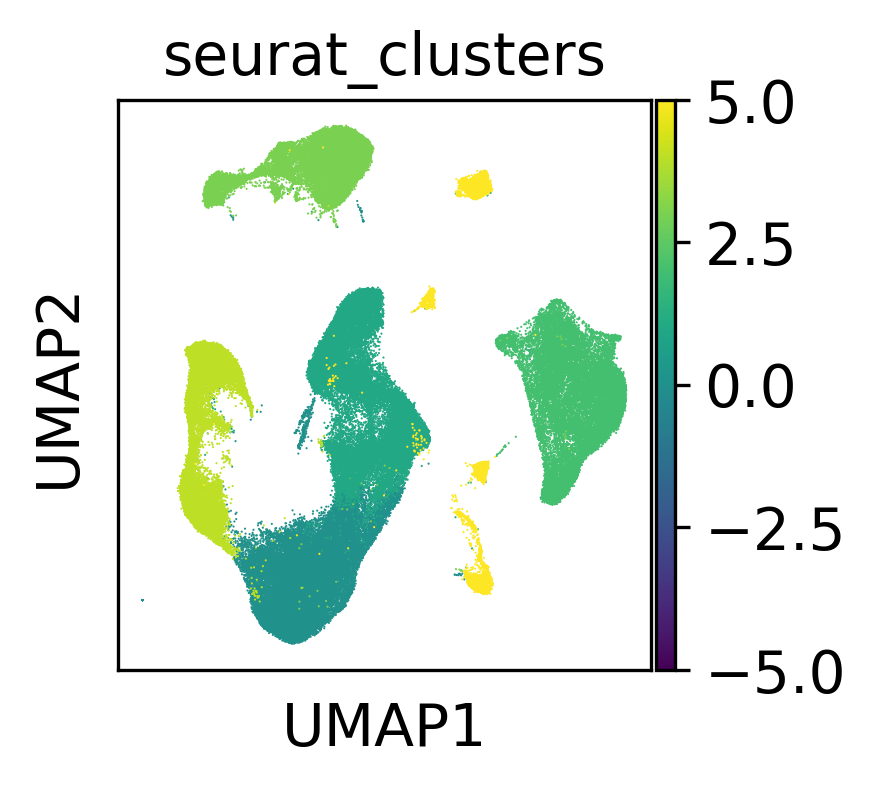

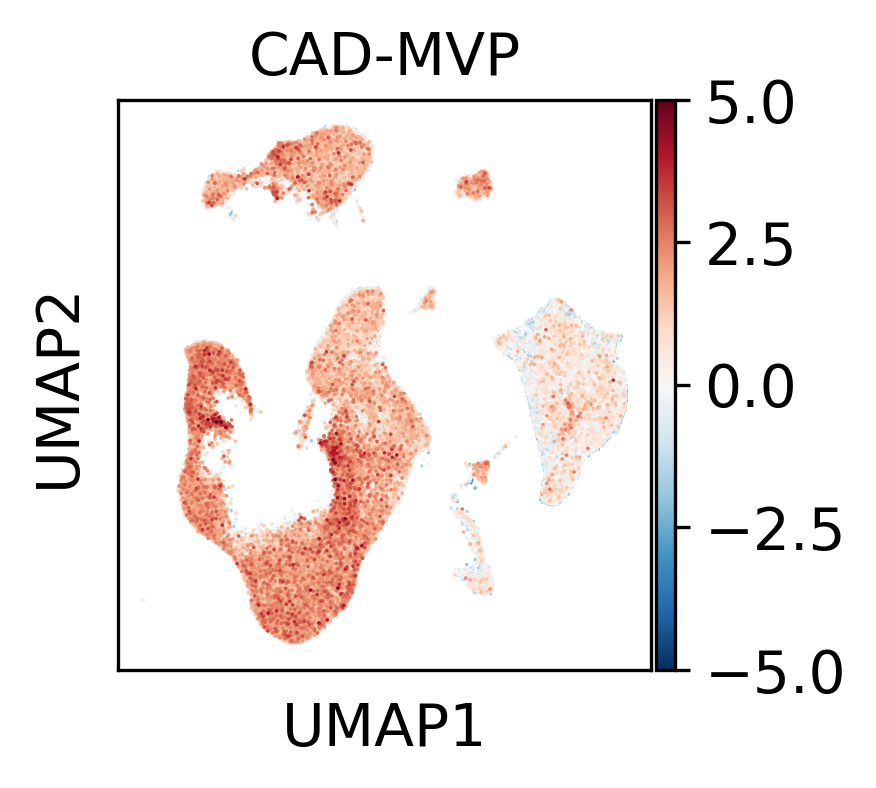

In [151]:
dict_score = {
    trait: pd.read_csv(f"/home/lidaniel/scDRS_output/CZI/{trait}.full_score.gz", sep="\t", index_col=0)
    for trait in df_gs.index
}

for trait in dict_score:
    adata2.obs[trait] = dict_score[trait]["norm_score"]

sc.set_figure_params(figsize=[2.5, 2.5], dpi=150)
sc.pl.umap(
    adata2,
    color="seurat_clusters",
    ncols=1,
    palette="tab20c",
    vmin=-5,
    vmax=5,
)

sc.pl.umap(
    adata2,
    color=dict_score.keys(),
    color_map="RdBu_r",
    vmin=-5,
    vmax=5,
    s=3,
)

In [152]:
adata2.obs["CAD-MVP"].sort_values(ascending = False)

AGACAGGGTACTGCCG-28    6.066487
TACCGAAGTCTTCAAG-4     5.149952
ACTACGATCTCTTAAC-3     5.137464
TATTCCATCCCAATAG-4     5.080886
TCCTCGACAAGTATAG-13    4.645316
                         ...   
CTAGACAGTATCCTTT-16   -4.049194
CCTAACCGTCTAGATC-23   -4.196270
AGTTCGAAGCGTACAG-26   -4.340849
GTGCTGGTCCTGGCTT-39   -4.358264
AACCTGAAGAATACAC-14   -4.672967
Name: CAD-MVP, Length: 113304, dtype: float64

In [142]:
!cat /home/lidaniel/scDRS_output/CZI/{trait}.scdrs_group.seurat_clusters | column -t -s $'\t'

group  n_cell   n_ctrl  assoc_mcp    assoc_mcz    hetero_mcp   hetero_mcz   n_fdr_0.05  n_fdr_0.1  n_fdr_0.2
0      23490.0  1000.0  0.024975024  1.9798989    0.044955045  1.9539199    0.0         0.0        1.0
1      20937.0  1000.0  0.94705296   -1.5152234   0.14885116   1.077638     0.0         0.0        0.0
2      18704.0  1000.0  0.04695305   1.8039461    0.002997003  3.5682666    1.0         1.0        1.0
3      13374.0  1000.0  0.6003996    -0.34920374  0.68731266   -0.6111886   0.0         0.0        0.0
4      13251.0  1000.0  0.33366632   0.39900514   0.002997003  4.2956653    0.0         0.0        0.0
5      8425.0   1000.0  0.01998002   2.295446     0.3146853    0.30976582   0.0         3.0        3.0
6      6873.0   1000.0  0.22777222   0.7569633    0.16683316   0.90761226   0.0         0.0        0.0
7      2979.0   1000.0  0.6023976    -0.30905616  0.05994006   1.6558554    0.0         0.0        0.0
8      1851.0   1000.0  0.4015984    0.15712138   0.022977022  2.47

(<Figure size 390x30 with 2 Axes>, <AxesSubplot: >)

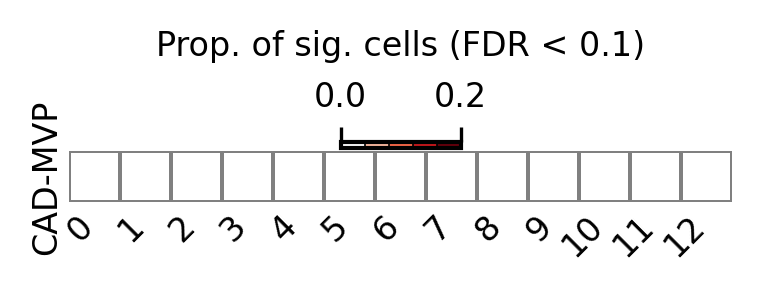

In [143]:
dict_df_stats = {
    trait: pd.read_csv(f"/home/lidaniel/scDRS_output/CZI/{trait}.scdrs_group.seurat_clusters", sep="\t", index_col=0)
    for trait in ["CAD-MVP"]
}
dict_celltype_display_name = {
    "SMC-1": "SMC-1",
    "SMC-2": "SMC-2",
    "FMC-1": "FMC",
    "CMC":"CMC",
    "Pericyte": "Pericyte",
    "Other": "Other"
}

scdrs.util.plot_group_stats(
    {
        trait: df_stats.rename(index=dict_celltype_display_name)
        for trait, df_stats in dict_df_stats.items()
    }
)

In [56]:
adata.obs_names

Index(['AAACGAAAGACTCATC-1', 'AAACGAACAACGACTT-1', 'AAACGAACAATCGCCG-1',
       'AAACGCTCAGCAGGAT-1', 'AAACGCTTCCGTGTCT-1', 'AAAGAACAGTGATCGG-1',
       'AAAGAACGTTGAATCC-1', 'AAAGAACTCTTCCAGC-1', 'AAAGGATAGCAATTAG-1',
       'AAAGGATTCCAACACA-1',
       ...
       'TTTGGAGCAGAAGTTA-39', 'TTTGGAGGTGAGTTGG-39', 'TTTGGTTCAACGTAAA-39',
       'TTTGGTTTCCCTCTAG-39', 'TTTGTTGAGTCTAGAA-39', 'TTTGTTGCAATAAGGT-39',
       'TTTGTTGCACCAGTAT-39', 'TTTGTTGGTAACGCGA-39', 'TTTGTTGGTACGTGAG-39',
       'TTTGTTGGTGAGTCAG-39'],
      dtype='object', length=113304)

In [58]:
!scdrs compute-score \
    --h5ad-file RDS/CZI_full_041223_075res_50dim-processed.h5ad \
    --h5ad-species human \
    --gs-file scDRS/aneurysm.gs \
    --gs-species human \
    --cov-file scDRS/CZI_0.075_res_50dim.txt\
    --flag-filter-data True \
    --flag-raw-count False \
    --flag-return-ctrl-raw-score False \
    --flag-return-ctrl-norm-score True \
    --n-ctrl 1000 \
    --out-folder scDRS/

******************************************************************************
* Single-cell disease relevance score (scDRS)
* Version 1.0.2
* Martin Jinye Zhang and Kangcheng Hou
* HSPH / Broad Institute / UCLA
* MIT License
******************************************************************************
Call: scdrs compute-score \
--h5ad-file RDS/CZI_full_041223_075res_50dim-processed.h5ad \
--h5ad-species human \
--cov-file scDRS/CZI_0.075_res_50dim.txt \
--gs-file scDRS/aneurysm.gs \
--gs-species human \
--ctrl-match-opt mean_var \
--weight-opt vs \
--adj-prop None \
--flag-filter-data True \
--flag-raw-count False \
--n-ctrl 1000 \
--flag-return-ctrl-raw-score False \
--flag-return-ctrl-norm-score True \
--out-folder scDRS/

Loading data:
--h5ad-file loaded: n_cell=113304, n_gene=22422 (sys_time=31.0s)
First 3 cells: ['AAACGAAAGACTCATC-1', 'AAACGAACAACGACTT-1', 'AAACGAACAATCGCCG-1']
First 5 genes: ['AL627309.1', 'AL627309.3', 'AL669831.5', 'FAM87B', 'LINC00115']
--cov-file loaded: c